In [1]:
# if you need to install the statsmodel library
!pip install --user statsmodels

DEPRECATION: Python 3.4 support has been deprecated. pip 19.1 will be the last one supporting it. Please upgrade your Python as Python 3.4 won't be maintained after March 2019 (cf PEP 429).


In [ ]:
# if you need to install scikit-learn
!pip install --user sklearn

# Lab 6 - Review of linear regression

A linear relationship between two variables is one in which the scatterplot of them looks roughly like a line.  *Linear regression* is a method for modelling how a *dependent variable* linearly depends on one or more *independent variables*.  The dependent variable (also called a *response variable* and many other things) is what we are trying to model or predict, and is usually denoted $Y$.  The independent variables (also called *explanatory* or *input variables*) are the information we are using to make the predictiong, and are usually denoted $X_1, X_2, ...$.

The linear relationship is: $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$$
where $\epsilon$ represents the error.

Here, $Y, X_1, X_2, ..., X_n$ are *random variables* which is what mathematical variables that can take different values with different probabilities are called.

Linear regression finds the coefficients $\beta_0, \beta_1, ..., \beta_n$ so that the sum of the squares of the error term for each data observation is minimized (as small as possible).

In this lab, we will look at a classic dataset used for studying regression containing data about Boston housing prices in the 1970s (?).

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

Load the dataset from the sci-kit learn package.

In [3]:
from sklearn.datasets import load_boston
boston_dict = load_boston()

Display the variable `boston_dict`:

In [4]:
boston_dict

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

`boston_orig` is not a dataframe!  It is something called a *dictionary* that contains the information in separate properties, called *keys*.  We can get the list of keys:

In [5]:
boston_dict.keys()

dict_keys(['DESCR', 'feature_names', 'filename', 'target', 'data'])

To see what is linked to a key:

In [6]:
boston_dict.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

To see the description of the data set:

In [7]:
print(boston_dict.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

What happens if you leave off print?

To convert the data into a Pandas dataframe:

In [8]:
boston = pd.DataFrame(boston_dict.data)

Display the dataframe `boston`:

In [9]:
boston

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


There are no column names, so let's repeat that command, but telling Pandas that the column names are in `feature_names`:

In [10]:
boston = pd.DataFrame(boston_dict  .data, columns = boston_dict.feature_names)

Display the new dataframe. 

In [11]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Each column in an independent variable.  (The columns were described when we did `print(boston_dict.DESCR)`).  The dependent variable that we want to predict is linked to the key called `target`, so we will add it to our dataframe as a column.

In [12]:
boston["price"] = boston_dict.target 

Check the column was added correctly.

In [13]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's look at how a few of the variables relate to the median housing price.

Let's see how the per capita crime rate per town (column `CRIM`) relates to median housing price (column `price` which is in $1000s) by plotting a scatter plot of the two variables.  

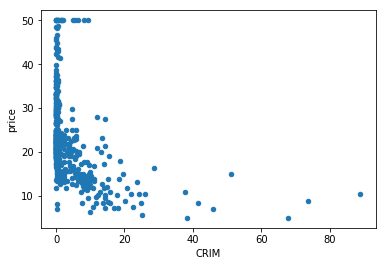

In [14]:
boston.plot.scatter(x = "CRIM", y = "price")

<details> <summary>Hint:</summary>
    <code>df.plot.scatter(x = "x_column_name", y = "y_column_name")</code>
</details>

Make a scatter plot of the relationship between the average number of rooms per dwelling (column `RM`) and the price.

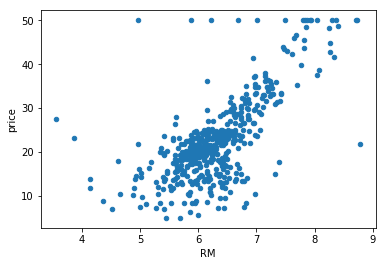

In [15]:
boston.plot.scatter(x = "RM", y = "price")

Finally plot the relationship between the pupil-teacher ratio per town (column `PTRATIO`) and the price.

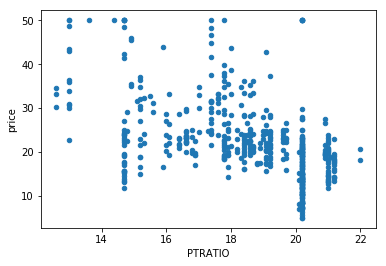

In [16]:
boston.plot.scatter(x = "PTRATIO", y = "price")

Of the three variable, `CRIM`, `RM`, and `PTRATIO`, which seems to have the most linear relationship with `price`?  Which of the relationships were positive (had a positive slope) and which were negative?

Let's perform linear regression using `RM` (average number of rooms) as the independent variable.  We want to predict `price` our dependent variable.

In [17]:
lm = smf.ols('price ~ RM',boston).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.49e-74
Time:                        17:41:10   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What's the equation of our linear model?

We can visualize the line using Seaborn:

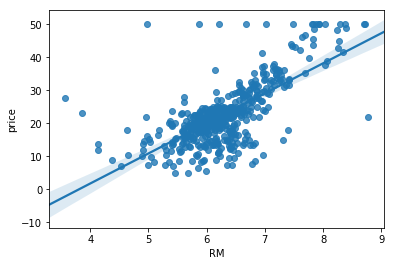

In [18]:
sns.regplot(y="price", x="RM", data=boston, fit_reg = True)

The *residuals* are the difference between the actual value of price and the value predicted by the regression line, for each row of the data.

In [19]:
lm.resid

0     -1.175746
1     -2.174021
2      3.971968
3      4.374062
4      5.817848
5      4.844060
6      2.848742
7      5.592404
8     -0.083355
9     -1.078442
10    -8.373528
11    -1.123952
12     2.768301
13     0.922174
14    -2.615836
15     1.468917
16     3.749604
17    -2.351012
18     5.209514
19     0.742843
20    -2.428126
21    -0.023459
22    -6.034533
23    -3.739939
24    -3.650273
25    -2.392087
26    -1.639939
27    -5.569832
28    -6.047577
29    -5.076855
         ...   
476   -7.647454
477   -1.606965
478   -7.025923
479   -0.626416
480    0.855257
481   -3.068615
482   -4.599371
483    4.024269
484    1.832139
485   -1.581891
486   -1.879674
487    1.522667
488    0.227718
489   -7.608197
490   -3.586420
491   -6.187297
492    0.312703
493    4.524885
494    5.231523
495    6.161663
496    5.310253
497    0.233001
498    1.085027
499    1.480976
500   -3.387790
501   -2.939584
502   -0.434286
503   -4.925691
504   -5.169108
505   -8.315096
Length: 506, dtype: floa

Plot a histogram of the residuals.  If the linear model is a good fit, the histogram should look like a normal distribution.  Does it?

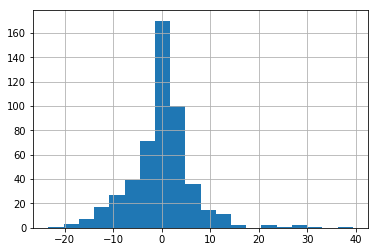

In [21]:
lm.resid.hist(bins = 20)

To better understand the relationship between the actual prices and the predicted or *fitted* values, we can plot a scatterplot of the two.  To get the fitted values, type `lm.fittedvalues`.  Try it below.

In [22]:
lm.fittedvalues

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
5      23.855940
6      20.051258
7      21.507596
8      16.583355
9      19.978442
10     23.373528
11     20.023952
12     18.931699
13     19.477826
14     20.815836
15     18.431083
16     19.350396
17     19.851012
18     14.990486
19     17.457157
20     16.028126
21     19.623459
22     21.234533
23     18.239939
24     19.250273
25     16.292087
26     18.239939
27     20.369832
28     24.447577
29     26.076855
         ...    
476    24.347454
477    13.606965
478    21.625923
479    22.026416
480    22.144743
481    26.768615
482    29.599371
483    17.775731
484    18.767861
485    22.781891
486    20.979674
487    19.077333
488    14.972282
489    14.608197
490    11.686420
491    19.787297
492    19.787297
493    17.275115
494    19.268477
495    16.938337
496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.8256

Let's plot a scatter plot of with the price as the x variable and the fitted values as the y variable.  The code is slightly different since the fitted values aren't part of the `boston` 

Text(0.5,1,'Prices vs Predicted Prices')

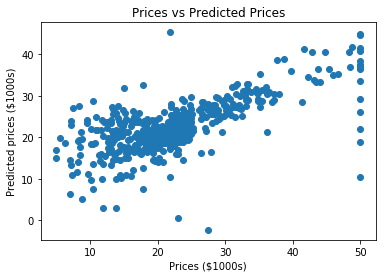

In [23]:
plt.scatter(boston['price'], lm.fittedvalues)
plt.xlabel("Prices ($1000s)")
plt.ylabel("Predicted prices ($1000s)")
plt.title("Prices vs Predicted Prices")

If all the prices were predicted correctly, what would this plot have looked like?  By noticing where this plot is least like a plot with perfectly predicted prices, we can see where our linear model fails (makes bad predictions).  Where do you notice errors in the prediction?

The most expensive houses are predicted incorrectly.  This is known as a *ceiling effect*, where the independent variable no longer has an effect on the dependent variable.

Find the linear model showing how price depends on `PTRATIO`, the pupil-teacher ratio by town:

Check the fit of your model by looking at the histogram of the residuals and the scatter plot of the predicted prices vs. the actual prices.

Do you think this linear model is a good predictor of prices?

Let's try making a linear regression model with three independent variables:

- `CRIM` (per capita crime rate by town)
- `RM` (average number of rooms per dwelling)
- `PTRATIO` (pupil-teacher ratio by town)

The code will be similar to above, but the formula is `price ~ CRIM + RM + PTRATIO`

Check the fit of your model by plotting the histogram of the residuals and the scatter plot of the predicted prices vs. the actual prices.

How did this linear model perform?